# Surface Gravity

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib_inline
import numpy as np
from astropy.table import QTable, Table, Column
import seaborn as sns

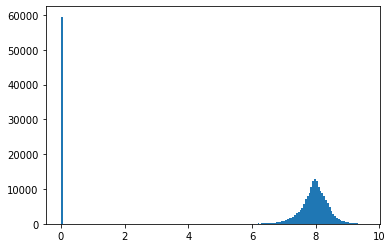

In [2]:
import statistics as stat
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable, Table, Column
t= Table.read("/home/sumit/Desktop/WD Project/mos_gaia_dr2_wd.fits", format="fits")
y= t["loggh"]
surface_gravity= np.array(y)
n=167
plt.hist(y,bins=n)
plt.show()

#ym= stat.mean(y)
#ysd= stat.stdev(y)
#print(ym,ysd)




In [3]:
q75, q25 = np.percentile(y, [75 ,25])
iqr = q75 - q25
print(iqr)
#print(surface_gravity.sort())
r= np.empty(1)
for i in range(len(y)):
    if y[i]>2:
        r= np.append(r,y[i])
        
print(stat.stdev(r))
print(stat.mean(r))
len(r)

1.876802682876587
0.42150733719307165
7.962411173134337


179201

7.9624111731343366
0.4215061611172538


[]

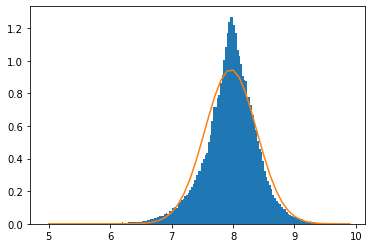

In [4]:
from scipy.stats import norm
(mu,sigma)=norm.fit(r)
x= np.arange(5,10,0.1)
print(mu)
print(sigma)
plt.hist(r, bins=n, density=True)
plt.plot(x,norm.pdf(x, 7.96241, 0.4215))
plt.plot()

# Teffh

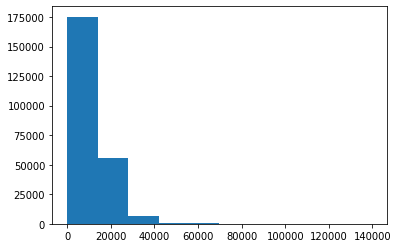

In [5]:
T= t["teffh"]
plt.hist(T)
plt.show()

In [6]:
q75, q25 = np.percentile(T, [75 ,25])
iqr = q75 - q25
print(iqr)
print(max(T))
len(T)

10425.49853515625
139637.75


238683

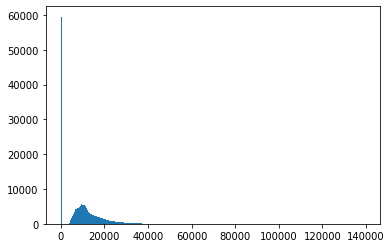

In [7]:
n=416
plt.hist(T, bins=n)
plt.show()

In [8]:
r1= np.empty(1)
for i in range(len(T)):
    if T[i]>0:
        r1= np.append(r1,T[i])
        
print(r1)
print(len(r1))
len(T)



[  241.64        5912.96484375 13259.83300781 ...  4868.265625
 12505.32128906 18969.09765625]
179201


238683

In [9]:
(mu,sigma)=norm.fit(r1)
print(mu,sigma)

13603.267417657167 7794.030136702584


7831.79296875
139637.75


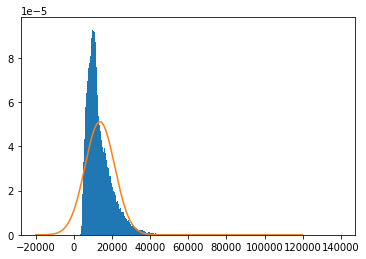

In [10]:
q75, q25 = np.percentile(r1, [75 ,25])
iqr = q75 - q25
print(iqr)
print(max(r1))
g= np.linspace(-20000,120000,120000)
n1= 503
plt.hist(r1, bins=n1, density= True)
plt.plot(g,norm.pdf(g,13603.26, 7794))
#plt.plot(g, norm.pdf(g, 10213.207, 8957.211))
plt.show()

In [11]:
S= sum(r1)
print(S)
r2= [x/S for x in r1]
print(sum(r2))

2437719124.511582
0.9999999999999938


In [12]:
(mu,sigma)=norm.fit(r1)

print(mu)
print(sigma)
print(max(r1))

13603.267417657167
7794.030136702584
139637.75


/tmp/ipykernel_969929/1677163330.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(T, shade=False, color='blue')


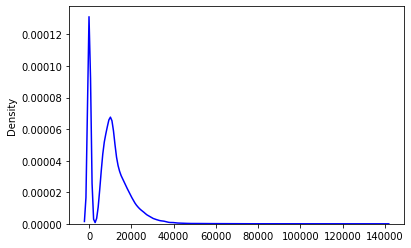

In [13]:
import seaborn as sns

g= np.linspace(-1,1200000)

sns.kdeplot(T, shade=False, color='blue')
#plt.plot(g, norm.pdf(g,5.5*10**-6, 3.19*10**-6))
plt.show()

# Absolute g mag.

238683


/tmp/ipykernel_969929/418016184.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(absg3, shade=False, color='blue')


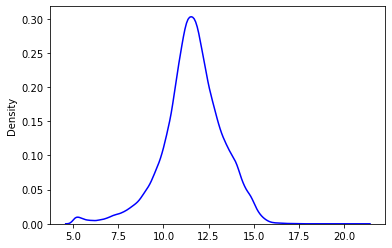

In [15]:
gmag= t["g_gaia_mag"]
parallax= t["plx"]
absg3= gmag - 5*np.log10(1000//parallax) +5
print(len(absg3))

#plt.hist(absg)
sns.kdeplot(absg3, shade=False, color='blue')
plt.show()

11.609105
1.6633855


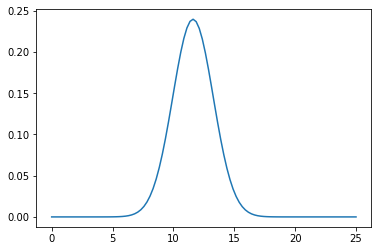

In [16]:
(mu,sigma)=norm.fit(absg3)

print(mu)
print(sigma)
x= np.linspace(0,25,100)
plt.plot(x, norm.pdf(x,mu,sigma))
plt.show()

In [17]:
(mu,sigma)=norm.fit(absg3)

print(mu)
print(sigma)


11.609105
1.6633855


# Apparent gmag

/tmp/ipykernel_969929/4198649895.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gmag, shade=False, color='blue')


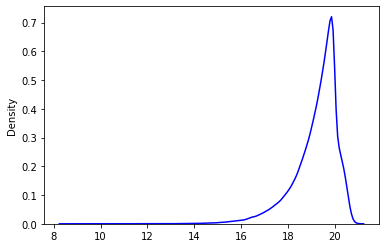

19.21088
0.95804167
238683


In [18]:
sns.kdeplot(gmag, shade=False, color='blue')
plt.show()
(mu,sigma)=norm.fit(gmag)

print(mu)
print(sigma)
print(len(gmag))


# bp_rp magnitude

/tmp/ipykernel_969929/589925146.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bp_rp, shade=False, color='blue')


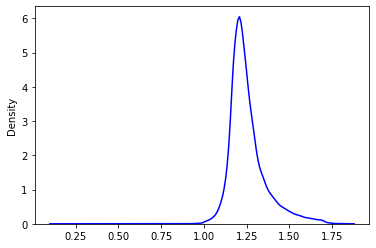

1.2541348
0.1081521


In [19]:
bp= t["e_fbp"]
rp=t["e_frp"]
bp_rp= t["e_br_rp"]

sns.kdeplot(bp_rp, shade=False, color='blue')
plt.show()

(mu,sigma)=norm.fit(bp_rp)

print(mu)
print(sigma)


# probable candidates

In [20]:
PC= Table.read("/home/sumit/Desktop/WD Project/possible candidates")
PC

wd,dr2name,source_id_1,source,ra_1,e_ra,dec_1,e_dec,plx,e_plx,pmra,e_pmra,pmdec,e_pmdec,epsi,amax,fg_gaia,e_fg_gaia,g_gaia_mag,fbp,e_fbp,bpmag,frp,e_frp,rpmag,e_br_rp,glon,glat,density,ag,sdss,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,pwd,f_pwd,teffh,e_teffh,loggh,e_loggh,massh,e_massh,chi2h,teffhe,e_teffhe,logghe,e_logghe,masshe,e_masshe,chisqhe,bp_rp_1,absg,gabs,designation,source_id_2,ra_2,dec_2,parallax,bp_rp_2,phot_g_mean_mag,mag_g,Separation
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mas,mag,mag,,arcsec
bytes23,bytes28,int64,int32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,bool,bytes28,int64,float64,float64,float64,float32,float32,float64,float64
WDJ025854.43+003040.34,Gaia DR2 74698071455360,74698071455360,243328,44.72646901556998,0.28567386112959603,0.5112707464812695,0.25599366159026676,14.50074,0.3657973,-78.52656079709863,0.5427489490094788,15.012084874836075,0.5470492489368379,0.0,0.5372557,534.38245,1.808201,18.868734,312.15863,18.408854,19.11545,362.21515,11.172177,18.364504,1.2619685,176.11511398045826,-48.74189973283115,2772.1445,0.17931461,J025854.44+003040.3,19.962,0.033,19.174,0.01,18.833,0.01,18.694,0.013,18.661,0.04,0.988624,0,5912.965,303.26047,8.372084,0.167457,0.827522,0.111186,1.319487,5759.198,311.5228,8.282587,0.185514,0.752814,0.123687,1.221527,0.75094604,14.980950608890595,True,Gaia DR3 74698071455360,74698071455360,44.726458253515965,0.5112728869230602,14.863119849432609,0.72904587,18.841656,14.702205629999279,0.039500724284144306
WDJ030344.01+013535.16,Gaia DR2 262680200430208,262680200430208,606848,45.93331759541777,0.3138628128423388,1.5929702744130014,0.36468165336485614,6.495403,0.41979772,-13.854503800930587,0.6890392571390287,-30.273132105738306,0.7153254897822505,0.5518591,0.7335058,272.8221,1.1564398,19.598667,193.12788,10.673004,19.636776,152.07256,8.272819,19.306793,1.2652949,176.22628782356864,-47.12311117707965,3709.4175,0.19922957,J030344.00+013534.8,20.046,0.051,19.68,0.014,19.567,0.019,19.661,0.026,19.644,0.07,0.995937,0,8281.609,1067.137,8.477053,0.345407,0.901866,0.215614,2.114426,8171.034,1011.76447,8.435442,0.347081,0.859042,0.222191,1.957661,0.32998276,13.743030643393025,True,Gaia DR3 262680200430208,262680200430208,45.93331581764398,1.5929660464340645,6.459824379809786,0.28192902,19.558094,13.609197580642693,0.016510560491748687
WDJ025709.00+004627.95,Gaia DR2 288175125714560,288175125714560,22144,44.28743100663697,0.16060624493570758,0.7743488847665643,0.12051266411169455,6.4437113,0.1741326,-18.312461787365933,0.316156734859026,-18.769005044323325,0.22360292616773153,0.06492882,0.30022407,1887.3164,4.556691,17.498755,1414.818,15.860915,17.474636,787.3212,12.67905,17.52154,1.1668098,175.3618545492405,-48.867639255550394,2520.2168,0.16459899,J025708.99+004627.8,17.821,0.012,17.36,0.005,17.569,0.006,17.794,0.008,17.985,0.023,0.999549,0,13046.988,710.4043,7.924339,0.096566,0.565066,0.053551,0.001597,12499.292,537.5434,7.830668,0.09858,0.491814,0.040766,8.662606,-0.04690361,11.4056810565219,True,Gaia DR3 288175125714560,288175125714560,44.287428493193936,0.7743463085708776,6.519816873090421,-0.02720642,17.467531,11.538708191991185,0.012956512680302137
WDJ025746.40+010106.05,Gaia DR2 298895364329216,298895364329216,265984,44.44328675778547,0.13194586887523976,1.0183526673350898,0.12993160262299974,6.408874,0.16253102,-13.341707747920683,0.3035643637689151,0.9581542979260997,0.2742975029236648,0.41533226,0.26910767,1412.041,3.1735063,17.813747,1130.23,14.646915,17.718472,556.2131,7.8492675,17.898817,1.1943301,175.26858661458755,-48.58473008869972,26

# Logg

/tmp/ipykernel_969929/3153734885.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gg, shade=False, color='blue')


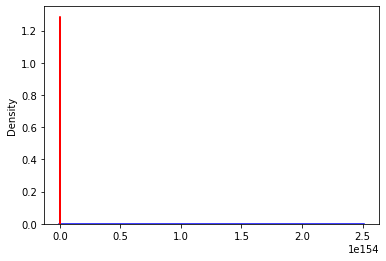

In [23]:
logg= PC["loggh"]


x= np.arange(0,10,0.1)
sns.kdeplot(gg, shade=False, color='blue')
plt.plot(x,norm.pdf(x,8.09,0.31),color="red")
plt.show()

In [49]:
gg=np.empty(1)
for i in range(len(logg)-1):
    if logg[i]>0:
        gg=np.append(gg,logg[i])
print(len(gg))
print(len(logg))


55620
57727


In [50]:
from scipy.stats import norm
(mu,sigma)=norm.fit(gg)

print(mu)
print(sigma)

8.095015682697468
0.3133676092550149


In [26]:
L= gg[i]-8.09 for i in range(len(gg)-1)
sig= np.sum(L[i]**2 for i in range(len(L)-1))
sigma= np.sqrt(sig)
print(sigma)

SyntaxError: invalid syntax (1975585706.py, line 1)

In [31]:
(mu,sigma)=norm.fit(unity_density)

print(mu)
print(sigma)

0.1
0.29999400699982554


8.095015682697468
0.3133676092550149


/tmp/ipykernel_969929/2143673124.py:1: DeprecationWarning: The normed argument is ignored when density is provided. In future passing both will result in an error.
  density, bins = np.histogram(gg, normed=True, density=True)


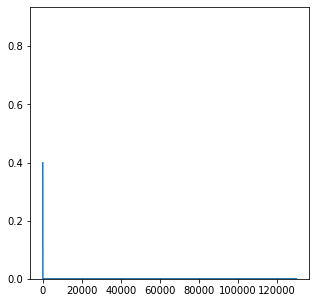

In [52]:
density, bins = np.histogram(gg, normed=True, density=True)
unity_density = density / density.sum()

fig, ax3 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5,5))
widths = bins[:-1] - bins[1:]
ax3.bar(bins[1:],unity_density, width=widths)

(mu,sigma)=norm.fit(gg)

print(mu)
print(sigma)
plt.plot(x,norm.pdf(x))
plt.show()

#print(sum(unity_density))

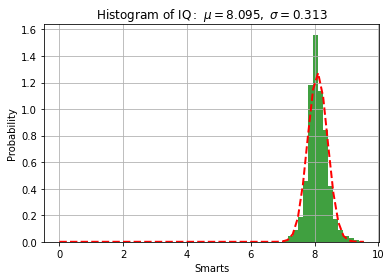

In [51]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# read data from a text file. One number per line


# best fit of data
(mu, sigma) = norm.fit(gg)

# the histogram of the data
n, bins, patches = plt.hist(gg, 60, density=True, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

# Teffh

/tmp/ipykernel_969929/631860550.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tt, shade=False, color='blue')


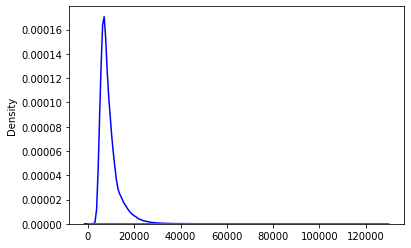

In [37]:
teffh= PC["teffh"]
x=np.linspace(0,130000,130000)

sns.kdeplot(tt, shade=False, color='blue')
plt.plot(x, norm.pdf(x,mu,sigma))
plt.show()

In [36]:
print(max(teffh), min(teffh))

tt=np.empty(1)
for i in range(len(logg)-1):
    if teffh[i]>0:
        tt=np.append(tt,teffh[i])
        
len(tt)

127521.78 0.0


55620

In [38]:
(mu,sigma)=norm.fit(tt)

print(mu)
print(sigma)

9196.259301977285
4571.395846367667


# Absolute g mag

/tmp/ipykernel_969929/1307934700.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(magg, shade=False, color='blue')


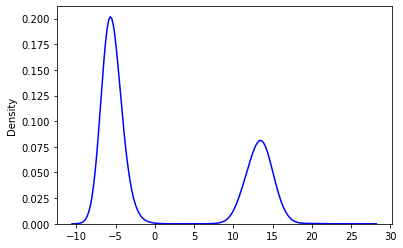

In [53]:
magg= PC["absg"]
x= np.linspace(-10,25,100)
sns.kdeplot(magg, shade=False, color='blue')
#plt.plot(x, norm.pdf(x,mu,sigma))
plt.show()

In [54]:
(mu,sigma)=norm.fit(magg)

print(mu)
print(sigma)
print(len(magg))

1.0979440273030923
9.01388109695664
57727


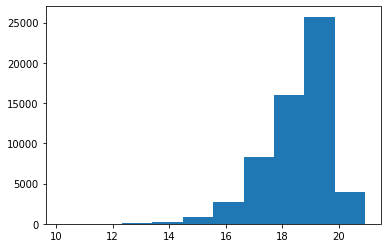

18.573776
1.1478771


In [55]:
apg= PC["phot_g_mean_mag"]

plt.hist(apg)
#sns.kdeplot(apg, shade=False, color='blue')
plt.show()

(mu,sigma)=norm.fit(apg)

print(mu)
print(sigma)

/tmp/ipykernel_969929/393003629.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(absg1, shade=False, color='blue')


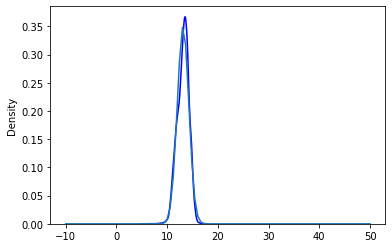

In [56]:
plx=PC["plx"]
absg1= apg - 5*np.log10(1000//plx) +5
x= np.linspace(-10,50,100)
sns.kdeplot(absg1, shade=False, color='blue')
plt.plot(x, norm.pdf(x,13.14, 1.14))
plt.show()

In [57]:
(mu,sigma)=norm.fit(absg1)

print(mu)
print(sigma)
print(len(absg1))

13.142723
1.1462163
57727


# bp_rp

/tmp/ipykernel_969929/1670595867.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(PC["bp_rp_2"], shade=False, color='red')


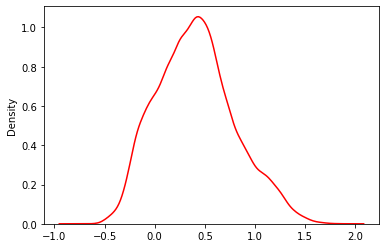

0.40856296
0.39469767


In [58]:
BP= PC["bpmag"]
RP= PC["rpmag"]
bprp= BP-RP

#sns.kdeplot(bprp, shade=False, color='blue')
sns.kdeplot(PC["bp_rp_2"], shade=False, color='red')
plt.show()

(mu,sigma)=norm.fit(bprp)

print(mu)
print(sigma)

# comparison

1.0000050002750152


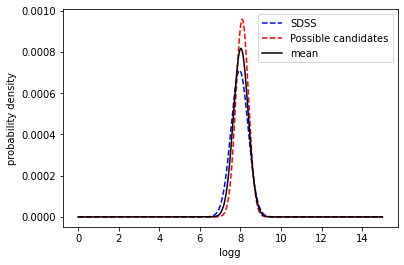

20000


In [59]:
x=np.linspace(0,15,20000)
dx= x[1]-x[0]
logg1=norm.pdf(x,7.96,0.421)/1333.26
logg2=norm.pdf(x, 8.09,0.312)/1333.26
mean= norm.pdf(x,8.025,0.366)/1333.26
print(sum(logg2))

plt.plot(x,logg1,color="blue",linestyle="dashed")
plt.plot(x,logg2, color="red", linestyle="dashed")
convolved = np.convolve(norm.pdf(x,7.96,0.421)/9.9499,norm.pdf(x, 7.79,1.54)/9.9499, mode="same")* dx
#plt.plot(x,convolved, color="black")
#plt.plot(x,np.mean(norm.pdf(x,7.96,0.421)/9.9499,norm.pdf(x, 7.79,1.54)/9.9499),color="black")
plt.plot(x, mean,color="black")
plt.xlabel("logg")
plt.ylabel("probability density")
plt.legend(["SDSS", "Possible candidates", "mean"], loc="upper right")
plt.show()
#print((mean))
print(len(logg2))


1.000037710665823 1.0000028855995469 1.0000966697936193


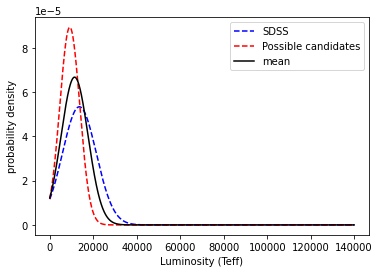

In [60]:
x= np.linspace(0,140000,140000 )
T1=norm.pdf(x,13603.26, 7794.03)/0.9595
T2=norm.pdf(x,9196.25, 4571.39)/0.97787
mean=norm.pdf(x,11399,6182.31)/0.9673
print(sum(T1), sum(T2), sum(mean))
#plt.plot(x,norm.pdf(x,13603.26, 7794))
#plt.plot(x, norm.pdf(x,9196.39, 457123))
plt.plot(x,T1,color="blue", linestyle="dashed")
plt.plot(x,T2,color="red", linestyle="dashed")
plt.plot(x,mean, color="black")
plt.xlabel("Luminosity (Teff)")
plt.ylabel("probability density")
plt.legend(["SDSS", "Possible candidates", "mean"], loc="upper right")
plt.show()


1.0000252531621883 1.0000000000000004
1.0000000000000002


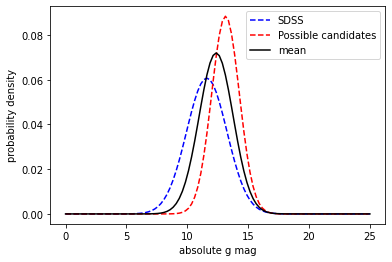

In [61]:
x=np.linspace(0,25,100)
abg1=norm.pdf(x,11.60, 1.66)/3.9599
abg2=norm.pdf(x,13.14, 1.14)/3.96
print(sum(abg1),sum(abg2))
mean= norm.pdf(x, 12.37, 1.4)/3.96
print(sum(mean))
plt.plot(x,abg1,color="blue", linestyle="dashed")
plt.plot(x,abg2,color="red", linestyle="dashed")
plt.plot(x,mean, color="black")
plt.xlabel("absolute g mag")
plt.ylabel("probability density")
plt.legend(["SDSS", "Possible candidates", "mean"], loc="upper right")
plt.show()



1.0000000000000002 1.00020206102241
1.0000000000000007


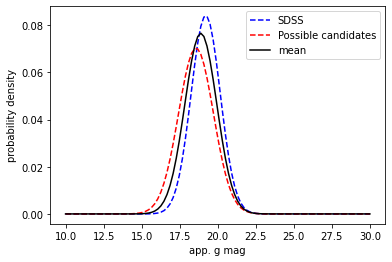

In [62]:
x=np.linspace(10,30,100)
apg1= norm.pdf(x,19.210, 0.958)/4.95
apg2= norm.pdf(x,18.573, 1.147)/4.949
print(sum(apg1), sum(apg2))
mean= norm.pdf(x,18.89, 1.052)/4.95
print(sum(mean))

plt.plot(x,apg1,color="blue", linestyle="dashed")
plt.plot(x,apg2,color="red", linestyle="dashed")
plt.plot(x,mean, color="black")
plt.xlabel("app. g mag")
plt.ylabel("probability density")
plt.legend(["SDSS", "Possible candidates", "mean"], loc="upper right")
plt.show()


1.0000000002723484 1.0001010203050817
1.0000000000000002


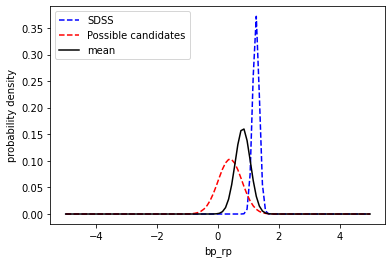

<Figure size 360x360 with 0 Axes>

In [63]:
x= np.linspace(-5,5,100)
bprp1= norm.pdf(x,1.254, 0.108)/9.900
bprp2= norm.pdf(x, 0.40, 0.39)/9.899
print(sum(bprp1), sum(bprp2))
mean= norm.pdf(x,0.82, 0.249)/9.900
print(sum(mean))
plt.plot(x,bprp1,color="blue", linestyle="dashed")
plt.plot(x,bprp2,color="red", linestyle="dashed")
plt.plot(x,mean, color="black")
plt.xlabel("bp_rp")
plt.ylabel("probability density")
plt.legend(["SDSS", "Possible candidates", "mean"], loc="upper left")
plt.figure(figsize=(5,5))
plt.show()

